# Project: TMDB Movies database Exploration.

# Table of Content:

* Introduction
* Data Wranglling
* EDA - Exploratory Data Analysis
* Conclusions


## 1. Introduction:

In this jupyter notebook we explore - The Movie Database (TMDb) - dataset which contains information about 10,000+ movies including user ratings, budgets and revenues and much more... I want to explore, find and share answers for many questions on this notebook. 

### I will try to answer these questions during this interesting exploration:

* Top Ten Directors, Actors, Production Companies and Movie Genres ?
* What is the Movies popularity trend over years ?
* Which genres was more populare over the years ?
* Compare lowest and highest Movies Budgets, Revenues, Profites and Runtime ?
* Check the properities of Top 100 Revenue Movies ?

## 2. Data Wrangling:

In this section:

    1. look on the dataset insights, to decide required data cleaning.
    2. Clean data (Remove duplicates, fill/drop missing data as required, Drop unused columns).
    3. Create function to help answer questions about the datset.

### 2.1. Look on dataset insights 

In [1]:
# imports and read file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("tmdb_movies_data.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [2]:
# check tail of dataframe
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


In [3]:
# check all columns names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
# explore information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check for duplicated information
df.duplicated().sum()

1

In [6]:
# Numerical features exploration
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# check NAN values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### from the previous exploration:

* Dataset consists of 10866 rows and 21 columns. 
* Only 1 duplicated row. 
* Various columns including budget and revenue contain 0 values.
* Various columns contain NAN values.
* Cast, Genres, and production companies columns need string sepration.

### 2.2. Clean Data:

        * Drop duplicates.
        * Drop not required columns.
        * Drop (runtime, budget_adj and revenue_adj) rows with 0 values.
        * Create profit column.
        * Separet strings in cast, genres and production_companies columns.
    

In [8]:
# drop duplicates
df.drop_duplicates(inplace = True)
df.shape

(10865, 21)

In [9]:
# drop unwanted columns
del_columns = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date',
               'vote_count', 'vote_average','budget','revenue']
# id, imdb_id won't be used
# release_year will be used instead of release_date
# popularity will be used instead of vote_count and vote_average
# budget_adj and revenue_adj will be used instead of budget and revenue to include inflation over time
# rest of deleted columns are not required
df.drop(del_columns, axis= 1, inplace = True)
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,101199955.5,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,183999919.0,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,174799923.1,1.385749e+09


In [10]:
# In order to increase accuracy of will replace 0 values in budget, revenue, and runtime columns to NAN
df["budget_adj"].replace(0, np.NaN, inplace = True)
df["revenue_adj"].replace(0, np.NaN, inplace = True)
df["runtime"].replace(0, np.NaN, inplace = True)

In [11]:
# Drop Rows with Nan Values
df.dropna(inplace = True)
df.shape

(3805, 10)

In [12]:
# Create profit column
df["profit"] = df["revenue_adj"] - df["budget_adj"]
df.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,137999939.3,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,137999939.3,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,101199955.5,2.716190e+08,1.704191e+08


In [13]:
# Separate mutiple values in Cast, genres, and production_companies columns and split them using ("|")
actors = df.cast.str.cat(sep="|").split("|")
genres = df.genres.str.cat(sep="|").split("|")
companies = df.production_companies.str.cat(sep="|").split("|")
#  Create a list of Top ten actors, genres, production companies
actors_list = pd.Series(actors).value_counts()[:10]
genres_list = pd.Series(genres).value_counts()[:10]
companies_list = pd.Series(companies).value_counts()[:10]

### 2.3. Create Function:

In this section we create min_max function to help explore and answer questions about the dataset

min_max Function - takes column name and return the min and max values to compare

In [14]:
# Create min_max function

def min_max (col_name):
    min_value = df[col_name].idxmin()
    min_df = pd.DataFrame(df.loc[min_value])
    
    max_value = df[col_name].idxmax()
    max_df = pd.DataFrame(df.loc[max_value])
    
    print (f"Lowest {col_name} is {df.original_title[min_value]} movie.")
    print (f"Highest {col_name} is {df.original_title[max_value]} movie.")
    
    min_max_value = pd.concat([min_df, max_df], axis = 1)
    return min_max_value

## 3. EDA - Exploratory Data Analysis
### Lets answer some questions !!!
### Q-1: Top Ten Directors, Actors, Production Companies and Movie Genres ?

In [15]:
# create colors list
colors_list = ["orange","red", "green", "blue","purple", "yellow", "gray","brown", "navy", "pink"]

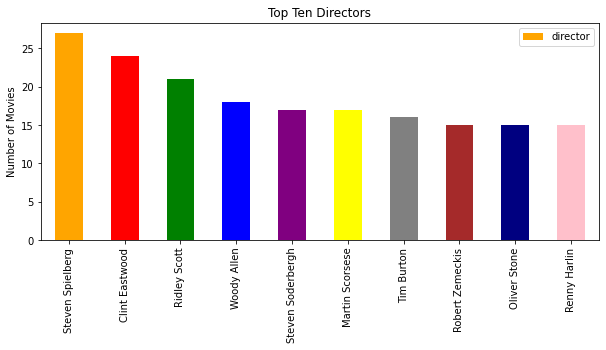

In [17]:
# check and plot top ten Directors
top_ten_dir = df.director.value_counts()[:10].plot.bar(figsize = (10,4),
                                                       color = colors_list,
                                                       title = "Top Ten Directors",
                                                       ylabel = "Number of Movies",
                                                       legend = True);

### Great Directors in our Top Ten Directors list including: The Great Steven Spielberg, Clint Eastwood (My Favourite), and Ridley Scott.

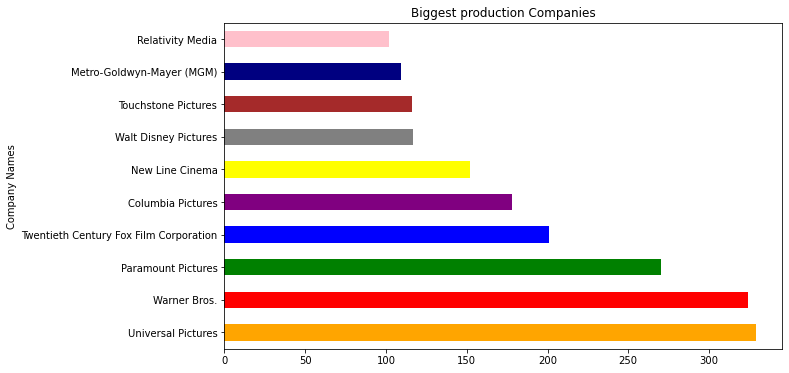

In [19]:
# plot biggest production companies 
big_prod_comp = companies_list.plot.barh(figsize=(10,6),
                                         color=colors_list,
                                         title = "Biggest production Companies",
                                         ylabel = "Company Names");

### Big Names in  Top Ten Production Companies; Universal Pictures comes first with over 300 produced movies, Warner Bros comes second with very small margine, Paramount comes third and Walt Disney comes in the Seventh Place.

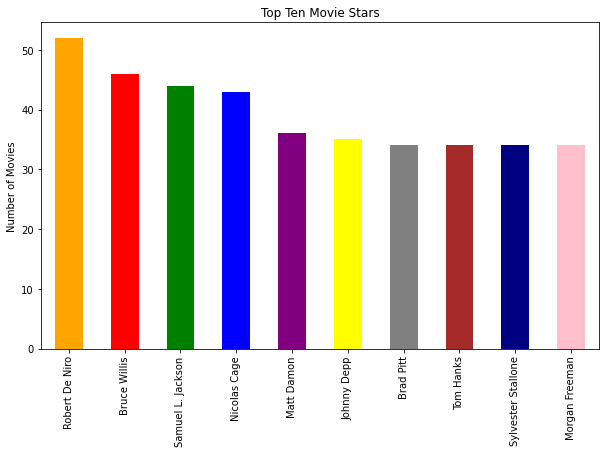

In [20]:
# plot top ten movie stars
top_ten_stars = actors_list.plot.bar(figsize =(10,6),
                                     color = colors_list,
                                     title = "Top Ten Movie Stars",
                                     ylabel = "Number of Movies");

### An incredible list including All time favourite Actors; Robert De Niro (aka: The complete actor) comes in first place with over 50 Movies, Bruce Willis the star of the Die Hard Movies Series comes in second place and the Wonderfull Samuel L.jackson Comes in third place.
### We notice that there is No Female Actress Names in the list like Sandra Bullock or Kate Winslet !! 

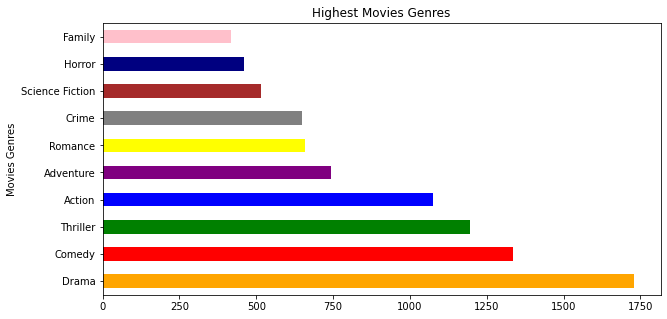

In [46]:
# plot highest movie genres
best_genres = genres_list.plot.barh(figsize=(10,5),
                                    color = colors_list,
                                    title = "Highest Movies Genres",
                                   ylabel = "Movies Genres");

### Drama comes on top of Movies Genres list followed by Comedy and Thriller movies. Romance comes in Sixth place and Family Movies in Tenth place 

### Q-2: What is the Movies popularity trend over years ?

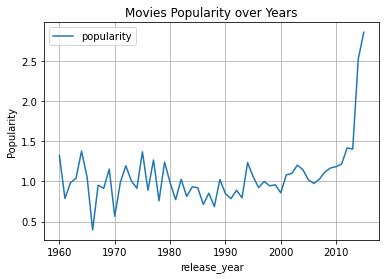

In [43]:
# lets check popularity of movies over the years 
year_pop = df.groupby("release_year").popularity.mean()
year_pop.plot(title = "Movies Popularity over Years",
              ylabel = "Popularity",
              legend = True,
             grid = True);

#### * From the graph a huge drop in Movies popularity is noticed between (1962-1966). 
#### * The popularity trends were stable during the 80's and 90's.
#### * From 1993 up to 2005 movies popularity was increasing gradually may be due to increase in number of theaters. 
#### * Movies popularity started increasing rapidly after year 2005 we can explain the quick increase due to high budget movies and increased number of produced movies. 

### Q-3: which movie genres were popular year to year ?

In [37]:
# check movies genres popularity over years
# year to year best genres from 2000 to 2015
sorted_genres = df[["release_year", "genres"]].sort_values(["release_year","genres"], ascending = False)
each_year_sorted_genres = pd.DataFrame(sorted_genres.groupby(["release_year"]).genres.max())
each_year_sorted_genres.tail(16)

,genres
release_year,
2000,Thriller|Science Fiction|Action
2001,War
2002,Western|Animation|Adventure|Comedy|Family
2003,Western
2004,Western|History|War
2005,Thriller|Science Fiction|Adventure|Action
2006,Western|Drama
2007,Western
2008,War|Drama


### Notice Thriller genres present in 2009, 2010, 2012, 2013 and 2015.

### Q-4: Compare lowest and highest Movies Budgets, Revenues, Profites and Runtime ?

In [40]:
# check min vs max profit movies
min_max("profit")

Lowest profit is The Warrior's Way movie.
Highest profit is Star Wars movie.


,2244,1329
popularity,0.25054,12.0379
original_title,The Warrior's Way,Star Wars
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director,Sngmoo Lee,George Lucas
runtime,100,121
genres,Adventure|Fantasy|Action|Western|Thriller,Adventure|Action|Science Fiction
production_companies,Boram Entertainment Inc.,Lucasfilm|Twentieth Century Fox Film Corporation
release_year,2010,1977
budget_adj,4.25e+08,3.95756e+07
revenue_adj,1.10876e+07,2.78971e+09


### Star wars come on top of high profit movies we notice the production year 1977 which mean that although its an old production; the revenues were very high to win maximum profit.  

In [41]:
# check min vs max budget movies
min_max("budget_adj")

Lowest budget_adj is Love, Wedding, Marriage movie.
Highest budget_adj is The Warrior's Way movie.


,3581,2244
popularity,0.52043,0.25054
original_title,"Love, Wedding, Marriage",The Warrior's Way
cast,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Dermot Mulroney,Sngmoo Lee
runtime,90,100
genres,Comedy|Romance,Adventure|Fantasy|Action|Western|Thriller
production_companies,120dB Films|Scion Films|Voodoo Production Serv...,Boram Entertainment Inc.
release_year,2011,2010
budget_adj,0.969398,4.25e+08
revenue_adj,1335.83,1.10876e+07


### The Warrior's way comes in the top highest budget movies but didn't make the biggest profits, i beleive its a huge production Movie, I'm cerious to watch this movie myself to rate it!

In [42]:
# check min vs max revenue movies
min_max("revenue_adj")

Lowest revenue_adj is Shattered Glass movie.
Highest revenue_adj is Avatar movie.


,5067,1386
popularity,0.462609,9.43277
original_title,Shattered Glass,Avatar
cast,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Billy Ray,James Cameron
runtime,94,162
genres,Drama|History,Action|Adventure|Fantasy|Science Fiction
production_companies,Lions Gate Films|Cruise/Wagner Productions|Bau...,Ingenious Film Partners|Twentieth Century Fox ...
release_year,2003,2009
budget_adj,7.11212e+06,2.40887e+08
revenue_adj,2.37071,2.82712e+09


### Avatar is the highest Revenue Movie, however Avatar isn't the top profit movie due to high budget spent on animations and production of this great movie.

In [43]:
# check min vs max runtime movies
min_max("runtime")

Lowest runtime is Kid's Story movie.
Highest runtime is Carlos movie.


,5162,2107
popularity,0.208637,0.534192
original_title,Kid's Story,Carlos
cast,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director,Shinichiro Watanabe,Olivier Assayas
runtime,15,338
genres,Science Fiction|Animation,Crime|Drama|Thriller|History
production_companies,Studio 4Â°C,Egoli Tossell Film AG|Canal+|Arte France|Films...
release_year,2003,2010
budget_adj,11.8535,1.8e+07
revenue_adj,5.92676,871279


### The Kid's story animation movie has the shortest runtime duration with 15 miniutes, while Carlos has the longest runtime of 338 miniutes

In [44]:
# check min vs max popularity movies
min_max("popularity")

Lowest popularity is Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´ movie.
Highest popularity is Jurassic World movie.


,6065,0
popularity,0.010335,32.9858
original_title,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,Jurassic World
cast,Thomas Kretschmann|Yanina Studilina|Philippe R...,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director,Fyodor Bondarchuk,Colin Trevorrow
runtime,131,124
genres,War|Action,Action|Adventure|Science Fiction|Thriller
production_companies,Art Pictures Studio,Universal Studios|Amblin Entertainment|Legenda...
release_year,2013,2015
budget_adj,2.8081e+07,1.38e+08
revenue_adj,6.37715e+07,1.39245e+09


### Jurassic World is the most popular movie of our datset, No surprises for this result as the smart idea of Dinosaurs existance, compined with huge production of 138 Million USD was a great popular movie. 

### Q-5: Check the properities of Top 100 Revenue Movies ?

In [27]:
# create a datframe sorted by top revenue movies
# drop unwanted columns 

df_revenue = pd.DataFrame(df.sort_values(["revenue_adj"], ascending=False, ignore_index= True))
df_revenue.drop(["original_title", "cast", "director", "genres", "production_companies", "release_year"], axis = 1, inplace = True)
df_revenue.head()

,popularity,runtime,budget_adj,revenue_adj,profit
0,9.432768,162.0,2.408869e+08,2.827124e+09,2.586237e+09
1,12.037933,121.0,3.957559e+07,2.789712e+09,2.750137e+09
2,4.355219,194.0,2.716921e+08,2.506406e+09,2.234714e+09
3,2.010733,122.0,3.928928e+07,2.167325e+09,2.128036e+09
4,2.563191,124.0,2.836275e+07,1.907006e+09,1.878643e+09


In [28]:
# check top 100 high revnue movies popularity, runtime, bugdet and profit properities
df_revenue[:100].describe()

,popularity,runtime,budget_adj,revenue_adj,profit
count,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,4.458492,131.630000,1.324182e+08,1.070078e+09,9.376597e+08
std,3.846122,26.168319,7.743329e+07,4.028286e+08,4.109621e+08
min,0.142486,78.000000,1.235601e+07,7.214689e+08,5.535378e+08
25%,2.210300,115.000000,6.517483e+07,8.078311e+08,6.737869e+08
50%,3.642131,132.500000,1.366043e+08,9.600996e+08,8.241871e+08
75%,5.760471,146.500000,1.872243e+08,1.141442e+09,1.032382e+09
max,32.985763,201.000000,3.683713e+08,2.827124e+09,2.750137e+09


In [29]:
# Create dataframe to compare mean values of Top 100 Revenue Movies VS the mean values of all Movies

df_revenue_top_100 = pd.DataFrame([df_revenue[:100].mean(), df_revenue.mean()])
df_revenue_top_100.head()

,popularity,runtime,budget_adj,revenue_adj,profit
0,4.458492,131.630000,1.324182e+08,1.070078e+09,9.376597e+08
1,1.203784,109.351117,4.471977e+07,1.387159e+08,9.399617e+07


In [30]:
# divide budget_adj, revenue_adj, profit columns by 1000000 to get values in Million USD

df_revenue_top_100["budget_adj"] = df_revenue_top_100["budget_adj"]/1000000
df_revenue_top_100["revenue_adj"] = df_revenue_top_100["revenue_adj"]/1000000
df_revenue_top_100["profit"] = df_revenue_top_100["profit"]/1000000
df_revenue_top_100.head()

,popularity,runtime,budget_adj,revenue_adj,profit
0,4.458492,131.630000,132.418197,1070.077848,937.659652
1,1.203784,109.351117,44.719765,138.715934,93.996169


In [31]:
# Transpose the Dataframe to compare values 
df_revenue_top_100.T

,0,1
popularity,4.458492,1.203784
runtime,131.630000,109.351117
budget_adj,132.418197,44.719765
revenue_adj,1070.077848,138.715934
profit,937.659652,93.996169


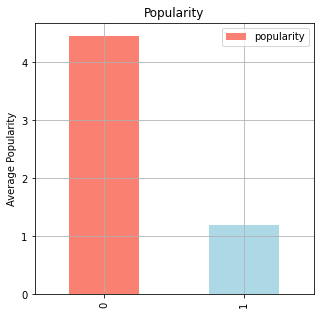

In [37]:
# compare popularity 
df_revenue_top_100.popularity.plot(kind = "bar", 
                               figsize = (5,5),
                               color=["salmon", "lightblue"],
                               title = "Popularity",
                               ylabel = "Average Popularity",
                                legend =True,
                                  grid = True);

### Top 100 revenue movies Average Popularity is 4.4  - (4 times higher than an average movie)

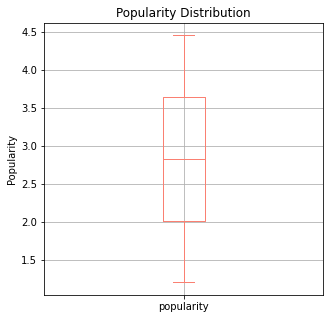

In [38]:
# popularity disribution of the Top 100 revenue movies

df_revenue_top_100.popularity.plot(kind = "box", 
                               figsize = (5,5),
                               color="salmon",
                               title = "Popularity Distribution",
                               ylabel = "Popularity",
                                  grid = True);

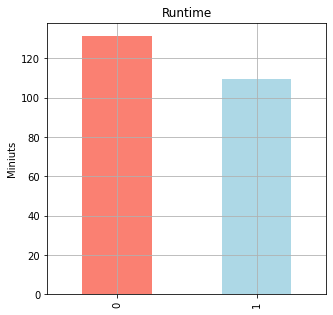

In [36]:
# Compare runtime 
df_revenue_top_100.runtime.plot(kind = "bar", 
                           figsize = (5,5),
                               color=["salmon", "lightblue"],
                               title = "Runtime",
                               ylabel = "Miniuts",
                               grid = True);

### Top 100 Revenue movies Average Runtime is 131 min - (22 miniutes longer than an average movie)

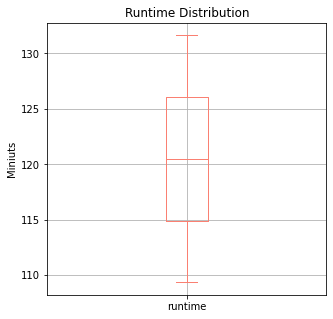

In [35]:
# Runtime disribution of the Top 100 revenue movies

df_revenue_top_100.runtime.plot(kind = "box", 
                               figsize = (5,5),
                               color="salmon",
                               title = "Runtime Distribution",
                               ylabel = "Miniuts",
                               grid = True);

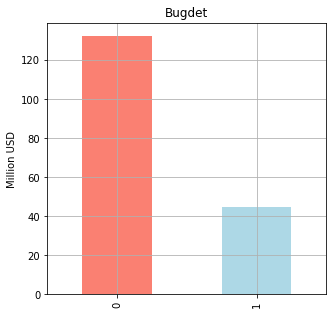

In [39]:
# Compare Budgets
df_revenue_top_100.budget_adj.plot(kind = "bar", 
                               figsize = (5,5),
                               color=["salmon", "lightblue"],
                               title = "Bugdet",
                               ylabel = "Million USD",
                                  grid = True);

### Average Budget is 130 million USD - (4 times higher than an average movie) - this result indicate the relation between high budget movies are connected with high revenue movies. 

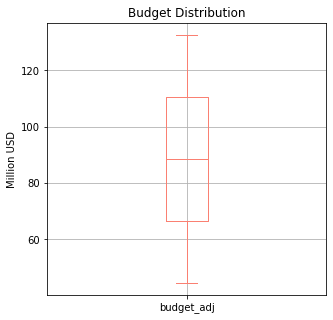

In [40]:
# Budget disribution of the Top 100 revenue movies

df_revenue_top_100.budget_adj.plot(kind = "box", 
                               figsize = (5,5),
                               color="salmon",
                               title = "Budget Distribution",
                               ylabel = "Million USD",
                                  grid = True);

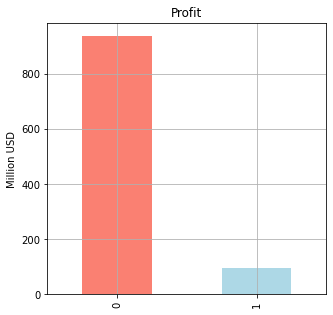

In [41]:
# Compare Profits
df_revenue_top_100.profit.plot(kind = "bar", 
                               figsize = (5,5),
                               color=["salmon", "lightblue"],
                               title = "Profit",
                               ylabel = "Million USD",
                              grid = True);

### Average Profit is 930 million USD - (10 Times higher than an average movie)

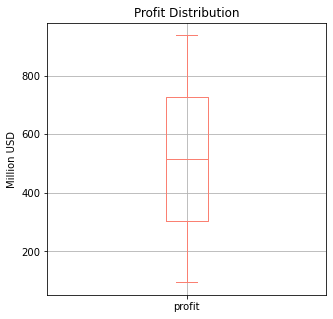

In [42]:
# Profit disribution of the Top 100 revenue movies

df_revenue_top_100.profit.plot(kind = "box", 
                               figsize = (5,5),
                               color="salmon",
                               title = "Profit Distribution",
                               ylabel = "Million USD",
                              grid = True);

## Conculisions and Interesting Findings 


* Biggest Production Companies: Universal pictures, Warners Bros, Paramont Pictures.
* Best Directors: Steven Spielberg, Clint Eastwood, Ridly Scott.
* Best Actor: Roberts De Niro, Bruce Willis, Samuel L. jackson.
* Best Movie Genres: Drama, Comedy, Thriller.

* Movies popularity started increasing quickly after year 2005.
* Thriller genres is present in top popularity genres year 2009, 2010, 2012, 2013, 2015.

* Lowest profit is The Warrior's Way movie and Highest profit is Star Wars movie.
* Lowest budget_adj is Love, Wedding, Marriage movie and Highest budget_adj is The Warrior's Way movie.
* Lowest revenue_adj is Shattered Glass movie and Highest revenue_adj is Avatar movie.
* shortest runtime is Kid's Story movie and Longest runtime is Carlos movie.

#### Top 100 Revenue movies have the following properites:
1. Average Popularity is 4.4  - (4 times higher than an average movie)
2. Average Runtime is 131 min - (22 miniutes longer than an average movie)
3. Average Budget is 130 million USD - (4 times higher than an average movie)
4. Average Profit is 930 million USD - (10 Times higher than an average movie)

### Limitation:

* The dataset contains a huge amount of 0 and NaN values; which forced us to drop over 6000 movies, which can mislead final results.
* We use (budget_adj, revenue_adj) columns to account for inflation over time, if (budget, revenue) columns are used different results will appear. 